In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
covid = pd.read_csv("Covid Data.csv")

In [3]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid.shape

(1048575, 21)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
covid.columns= covid.columns.str.lower()

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [8]:
covid["death"] = [2 if each == "9999-99-99" else 1 for each in covid.date_died]

In [9]:
covid.describe()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,death
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,...,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01,1.926622e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,...,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01,2.607556e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01,2.000000e+00


In [10]:
covid = covid[(covid.obesity == 1) | (covid.obesity == 2)]
covid = covid[(covid.pneumonia == 1) | (covid.pneumonia == 2)]
covid = covid[(covid.diabetes == 1) | (covid.diabetes == 2)]
covid = covid[(covid.copd == 1) | (covid.copd == 2)]
covid = covid[(covid.asthma == 1) | (covid.asthma == 2)]
covid = covid[(covid.inmsupr == 1) | (covid.inmsupr == 2)]
covid = covid[(covid.hipertension == 1) | (covid.hipertension == 2)]
covid = covid[(covid.other_disease == 1) | (covid.other_disease == 2)]
covid = covid[(covid.cardiovascular == 1) | (covid.cardiovascular == 2)]
covid = covid[(covid.renal_chronic == 1) | (covid.renal_chronic == 2)]
covid = covid[(covid.tobacco == 1) | (covid.tobacco == 2)]

In [11]:
pd.crosstab(covid.sex, covid.obesity)

obesity,1,2
sex,,
1,81856,431360
2,75105,436831


In [12]:
covid.drop(columns = ["intubed", "icu","date_died"], inplace = True)

In [13]:
covid.pregnant = covid.pregnant.replace(97,2)

In [14]:
covid = covid[(covid.pregnant == 1)| (covid.pregnant == 2)]

In [15]:
for i in covid.columns:
    print(i,"\t", len(covid[i].unique()))

usmer 	 2
medical_unit 	 13
sex 	 2
patient_type 	 2
pneumonia 	 2
age 	 121
pregnant 	 2
diabetes 	 2
copd 	 2
asthma 	 2
inmsupr 	 2
hipertension 	 2
other_disease 	 2
cardiovascular 	 2
obesity 	 2
renal_chronic 	 2
tobacco 	 2
clasiffication_final 	 7
death 	 2


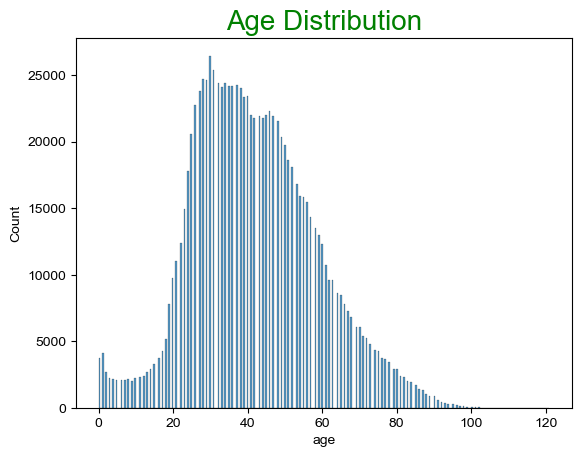

In [32]:
sns.histplot(x=covid.age)
plt.title("Age Distribution", color = "green", fontsize = 20);

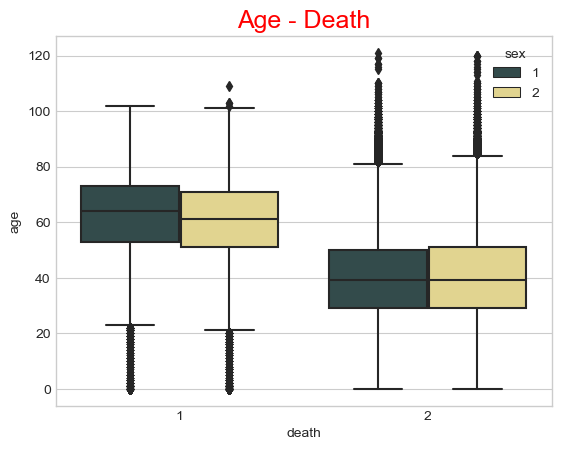

In [38]:
sns.boxplot(x="death", y="age",hue="sex",data=covid, palette=sns.color_palette(["#2f4f4f", "#eedd82"]))
plt.title("Age - Death", fontsize = 18, color = "red");

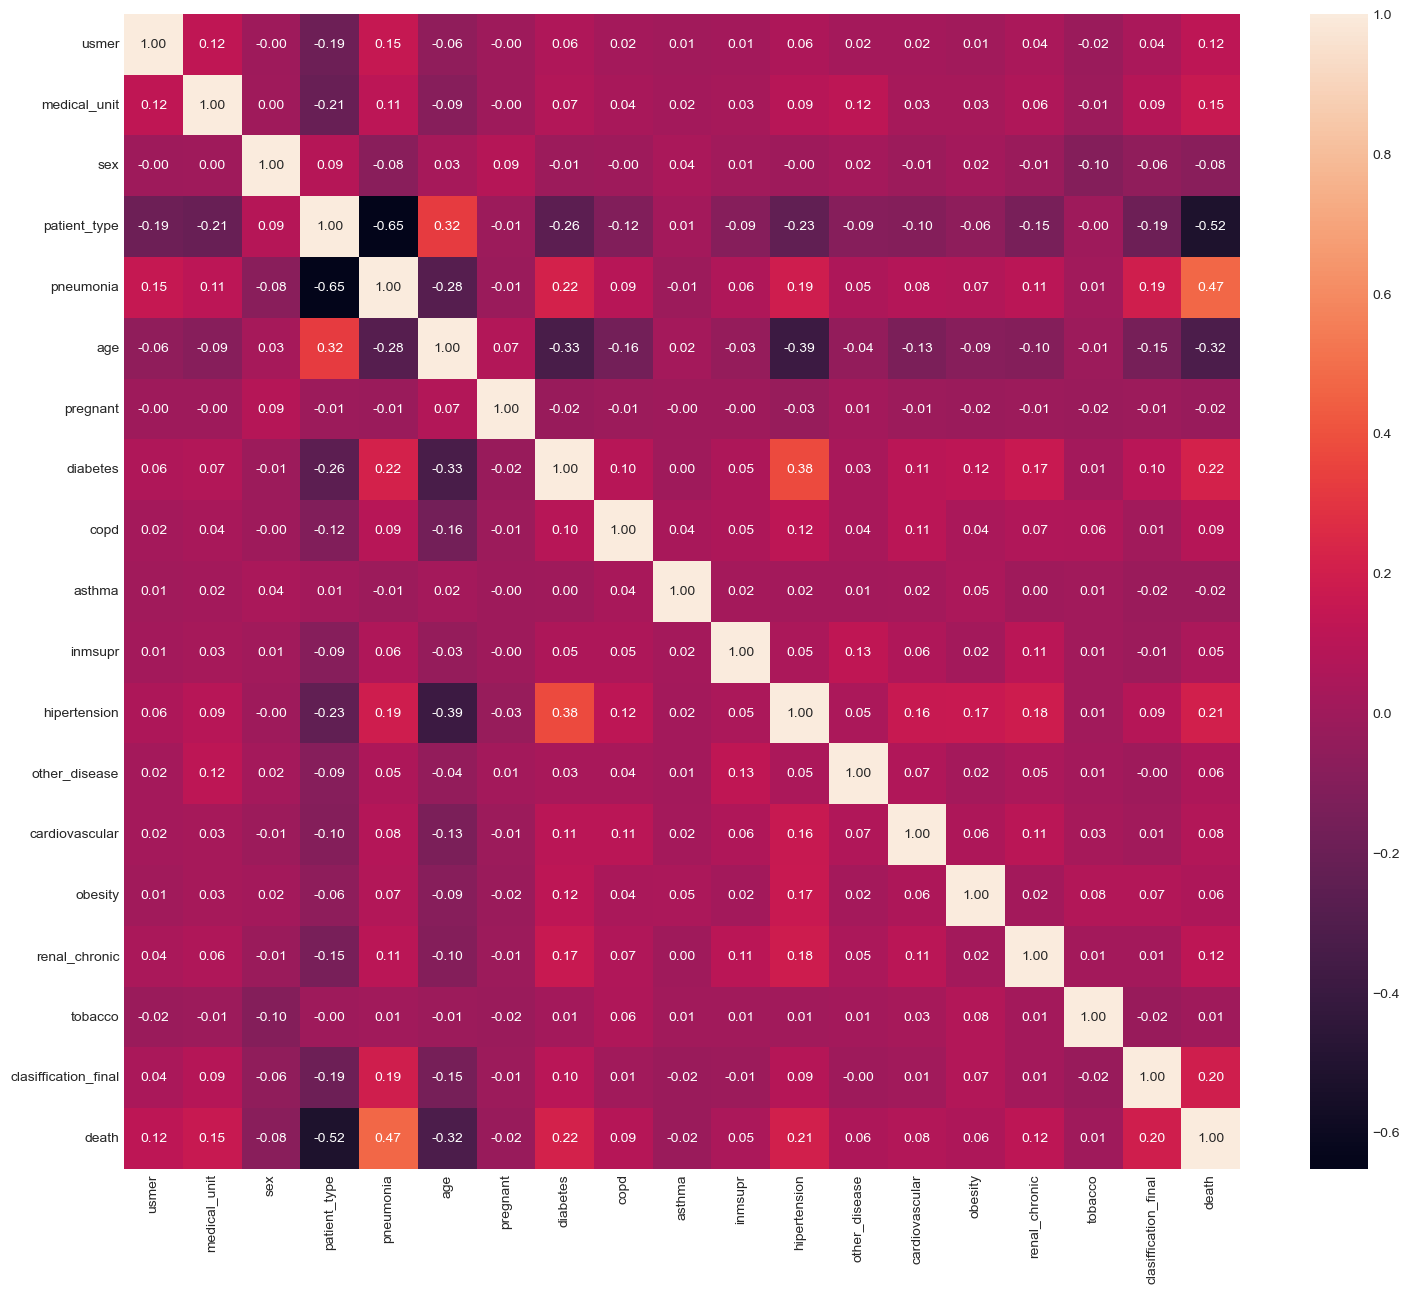

In [44]:
plt.figure(figsize=(18,15))
sns.heatmap(covid.corr(),annot= True,fmt=".2f");

In [45]:
unrelevant_columns = ["sex","pregnant","copd","asthma","inmsupr","other_disease","cardiovascular","obesity","tobacco"]
covid.drop(columns = unrelevant_columns, inplace = True)

In [46]:
covid.head()

,usmer,medical_unit,patient_type,pneumonia,age,diabetes,hipertension,renal_chronic,clasiffication_final,death
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [50]:
covid = pd.get_dummies(covid,columns=["medical_unit", "clasiffication_final"],drop_first=True)

In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
covid.age = scaler.fit_transform(covid.age.values.reshape(-1,1))

In [52]:
x = covid.drop(columns="death")
y = covid["death"]

In [55]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=42)
print("Train_x : ", train_x.shape)
print("Test_x : ", test_x.shape)
print("Train_y : ", train_y.shape)
print("Test_y : ", test_y.shape)

Train_x :  (817581, 25)
Test_x :  (204396, 25)
Train_y :  (817581,)
Test_y :  (204396,)


In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 10000)
model.fit(train_x, train_y)
print("Logistic Regression Accuracy : ", model.score(test_x,test_y))

Logistic Regression Accuracy :  0.9394313000254408


In [60]:
from sklearn.metrics import f1_score
print("Logistic Regression F1 Score : ", f1_score(test_y, model.predict(test_x), average=None))

Logistic Regression F1 Score :  [0.51899915 0.9676808 ]


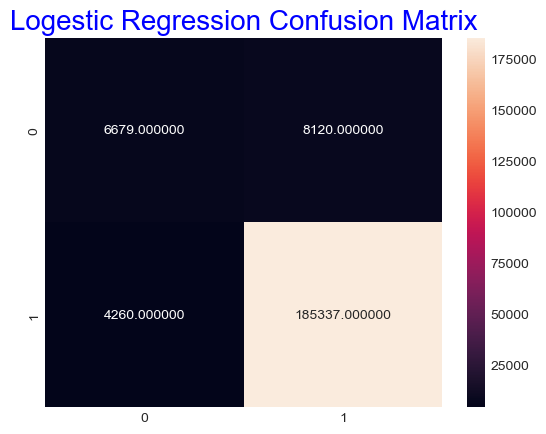

In [62]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_y, model.predict(test_x)),annot=True, fmt= "0f")
plt.title("Logestic Regression Confusion Matrix", fontsize= 20, color = "blue");

In [65]:
import joblib
filename = "Covid_Linear_Regression.sav"
joblib.dump(model,filename)

['Covid_Linear_Regression.sav']

In [66]:
loaded_model = joblib.load(filename)

In [67]:
result = loaded_model.score(test_x,test_y)

In [68]:
print(result)

0.9394313000254408
